# Python for Data Analysis - part11

##### Python의 numpy, pandas 등을 정리하였으며 파이썬 라이브러리를 활용한 데이터분석(2판)을 참고하여 작성하였습니다.
##### 해당 자료는 python 3.6 기반으로 작성되었습니다.

## 11. 시계열

### 11.1 날짜, 시간 자료형, 도구

In [3]:
from datetime import datetime

now = datetime.now()
print(now)
print("-----------------------------------------")

print(now.year, now.month, now.day)
print("-----------------------------------------")

# datetime.timedelta - 두 datetime 객체 간의 시간적인 차이
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print("-----------------------------------------")

print(delta.days)
print("-----------------------------------------")

print(delta.seconds)
print("-----------------------------------------")

2021-06-01 21:27:05.648808
-----------------------------------------
2021 6 1
-----------------------------------------
926 days, 15:45:00
-----------------------------------------
926
-----------------------------------------
56700
-----------------------------------------


In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)

print(start + timedelta(12))
print("-----------------------------------------")

print(start - 2*timedelta(12))
print("-----------------------------------------")

2011-01-19 00:00:00
-----------------------------------------
2010-12-14 00:00:00
-----------------------------------------


#### - datetime 모듈의 자료형 : date(날짜), time(시간), datetime(날짜와 시간), timedelta(datetime 간의 차이), tzinfo(지역시간대)

#### 11.1.1 문자열을 datetime으로 변환하기

In [5]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print("-----------------------------------------")

print(stamp.strftime('%Y-%m-%d'))
print("-----------------------------------------")

2011-01-03 00:00:00
-----------------------------------------
2011-01-03
-----------------------------------------


In [7]:
# datetiem.strptime - 문자열을 날짜로 변환
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))
print("-----------------------------------------")

datestrs = ['7/6/2011', '8/6/2011']
print([datetime.strptime(x, '%m/%d/%Y') for x in datestrs])
print("-----------------------------------------")

2011-01-03 00:00:00
-----------------------------------------
[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]
-----------------------------------------


In [11]:
from dateutil.parser import parse
print(parse('2011-01-03'))
print("-----------------------------------------")

print(parse('Jan 31, 1997 10:45 PM'))
print("-----------------------------------------")

print(parse('6/12/2011', dayfirst = True))
print("-----------------------------------------")

2011-01-03 00:00:00
-----------------------------------------
1997-01-31 22:45:00
-----------------------------------------
2011-12-06 00:00:00
-----------------------------------------


In [17]:
import pandas as pd
import numpy as np

# pd.to_datetime - 날짜 표현 처리
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
print(pd.to_datetime(datestrs))
print("-----------------------------------------")

idx = pd.to_datetime(datestrs + [None])
print(idx)
print("-----------------------------------------")

# NaT - Not a Time : 누락된 타임스탬프 데이터
print(idx[2])
print("-----------------------------------------")

print(pd.isnull(idx))
print("-----------------------------------------")

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)
-----------------------------------------
DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
-----------------------------------------
NaT
-----------------------------------------
[False False  True]
-----------------------------------------


### 11.2 시계열 기초

In [20]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), 
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index = dates)
print(ts)
print("-----------------------------------------")

print(ts.index)
print("-----------------------------------------")

print(ts + ts[::2])
print("-----------------------------------------")

print(ts.index.dtype)
print("-----------------------------------------")

stamp = ts.index[0]
print(stamp)
print("-----------------------------------------")

2011-01-02    0.591588
2011-01-05   -0.656335
2011-01-07   -1.247484
2011-01-08   -0.200765
2011-01-10    0.423296
2011-01-12   -1.944921
dtype: float64
-----------------------------------------
DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)
-----------------------------------------
2011-01-02    1.183176
2011-01-05         NaN
2011-01-07   -2.494968
2011-01-08         NaN
2011-01-10    0.846592
2011-01-12         NaN
dtype: float64
-----------------------------------------
datetime64[ns]
-----------------------------------------
2011-01-02 00:00:00
-----------------------------------------


#### 11.2.1 색인, 선택, 부분 선택

In [24]:
stamp = ts.index[2]
print(ts[stamp])
print("-----------------------------------------")

# 해석할 수 있는 날짜를 문자열로 색인 가능
print(ts['1/10/2011'])
print("-----------------------------------------")

print(ts['20110110'])
print("-----------------------------------------")

# 긴 시계열에서는 연을 너믹거나 연, 월만으로 색인 가능
longer_ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
print(longer_ts)
print("-----------------------------------------")

print(longer_ts['2001'])
print("-----------------------------------------")

print(longer_ts['2001-05'])
print("-----------------------------------------")

print(ts[datetime(2011, 1, 7) : ])
print("-----------------------------------------")

print(ts)
print("-----------------------------------------")

print(ts['1/6/2011' : '1/11/2011'])
print("-----------------------------------------")

-1.2474839560845352
-----------------------------------------
0.4232958371817437
-----------------------------------------
0.4232958371817437
-----------------------------------------
2000-01-01    0.220486
2000-01-02    0.124723
2000-01-03   -0.104609
2000-01-04    0.579454
2000-01-05   -1.150053
                ...   
2002-09-22    0.600657
2002-09-23   -0.264391
2002-09-24   -0.756636
2002-09-25   -0.342834
2002-09-26    1.977581
Freq: D, Length: 1000, dtype: float64
-----------------------------------------
2001-01-01    0.170587
2001-01-02   -0.727055
2001-01-03   -0.352941
2001-01-04   -0.239232
2001-01-05   -1.069942
                ...   
2001-12-27   -0.206491
2001-12-28    1.614806
2001-12-29    0.171716
2001-12-30   -1.021437
2001-12-31    1.178269
Freq: D, Length: 365, dtype: float64
-----------------------------------------
2001-05-01   -1.016796
2001-05-02    1.493946
2001-05-03    0.329891
2001-05-04    1.167336
2001-05-05   -0.314493
2001-05-06   -1.659031
2001-05-07   

In [26]:
print(ts.truncate(after = '1/9/2011'))
print("-----------------------------------------")

dates = pd.date_range('1/1/2000', periods = 100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index = dates, columns = ['colorado', 'texas', 'new york', 'ohio'])

print(long_df.loc['5-2001'])
print("-----------------------------------------")

2011-01-02    0.591588
2011-01-05   -0.656335
2011-01-07   -1.247484
2011-01-08   -0.200765
dtype: float64
-----------------------------------------
            colorado     texas  new york      ohio
2001-05-02 -0.717758 -0.048639  0.020001  0.229021
2001-05-09  0.080939 -0.214906 -0.565665 -0.849553
2001-05-16 -0.594170  1.123848 -0.852308 -0.440888
2001-05-23  1.261992  0.409262  1.041567  0.091402
2001-05-30 -2.363264  0.086655 -0.056859 -2.458684
-----------------------------------------


#### 11.2.2 중복된 색인을 갖는 시계열

In [28]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index = dates)

print(dup_ts)
print("-----------------------------------------")

print(dup_ts.index.is_unique)
print("-----------------------------------------")

print(dup_ts['1/3/2000'])
print("-----------------------------------------")

print(dup_ts['1/2/2000'])
print("-----------------------------------------")

# groupby(level = 0) - 단일 단계 인덱싱
grouped = dup_ts.groupby(level = 0)
print(grouped.mean())
print("-----------------------------------------")

print(grouped.count())
print("-----------------------------------------")

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64
-----------------------------------------
False
-----------------------------------------
4
-----------------------------------------
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64
-----------------------------------------
2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64
-----------------------------------------
2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64
-----------------------------------------


### 11.3 날짜 범위, 빈도, 이동
#### - pandas에서 리샘플링, 표준 시계열 빈도 모음, 빈도 추론, 고정된 빈도의 날짜 범위를 위한 도구 존재

In [29]:
print(ts)
print("-----------------------------------------")

# 일빈도 리샘플링
resampler = ts.resample('D')

2011-01-02    0.591588
2011-01-05   -0.656335
2011-01-07   -1.247484
2011-01-08   -0.200765
2011-01-10    0.423296
2011-01-12   -1.944921
dtype: float64
-----------------------------------------


#### 11.3.1 날짜 범위 생성하기

In [30]:
# pd.date_range() - 특정 빈도에 따라 지정한 길이만큼의 datetimeindex 생성
index = pd.date_range('2012-04-01', '2012-06-01')
print(index)
print("-----------------------------------------")

print(pd.date_range(start = '2012-04-01', periods=20))
print("-----------------------------------------")

print(pd.date_range(end = '2012-06-01', periods=20))
print("-----------------------------------------")

print(pd.date_range('2000-01-01', '2000-12-01', freq = 'BM')) # freq - 빈도 : BM(월 영업마감일)
print("-----------------------------------------")

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [31]:
print(pd.date_range('2012-05-02 12:56:31', periods=5))
print("-----------------------------------------")

# normalize - 정규화
print(pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True))
print("-----------------------------------------")

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')
-----------------------------------------
DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')
-----------------------------------------


#### 11.3.2 빈도와 날짜 오프셋

In [39]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
print(hour)
print("-----------------------------------------")

four_hours = Hour(4)
print(four_hours)
print("-----------------------------------------")

print(pd.date_range('2000-01-01', '2000-01-03 23:59', freq = '4h'))
print("-----------------------------------------")

print(Hour(2) + Minute(30))
print("-----------------------------------------")

print(pd.date_range('2000-01-01', periods=10, freq='1h30min'))
print("-----------------------------------------")

rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
print(list(rng))
print("-----------------------------------------")

<Hour>
-----------------------------------------
<4 * Hours>
-----------------------------------------
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')
-----------------------------------------
<150 * Minutes>
-----------------------------------------
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               

#### 11.3.3 데이터 시프트

In [42]:
ts = pd.Series(np.random.randn(4), index = pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print("-----------------------------------------")

print(ts.shift(2))
print("-----------------------------------------")

print(ts.shift(-2))
print("-----------------------------------------")

# timestamp 확장
print(ts.shift(2, freq='M'))
print("-----------------------------------------")

print(ts.shift(3, freq='D'))
print("-----------------------------------------")

print(ts.shift(1, freq = '90T'))
print("-----------------------------------------")

2000-01-31   -0.376823
2000-02-29    0.485738
2000-03-31   -0.304460
2000-04-30   -0.448909
Freq: M, dtype: float64
-----------------------------------------
2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.376823
2000-04-30    0.485738
Freq: M, dtype: float64
-----------------------------------------
2000-01-31   -0.304460
2000-02-29   -0.448909
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64
-----------------------------------------
2000-03-31   -0.376823
2000-04-30    0.485738
2000-05-31   -0.304460
2000-06-30   -0.448909
Freq: M, dtype: float64
-----------------------------------------
2000-02-03   -0.376823
2000-03-03    0.485738
2000-04-03   -0.304460
2000-05-03   -0.448909
dtype: float64
-----------------------------------------
2000-01-31 01:30:00   -0.376823
2000-02-29 01:30:00    0.485738
2000-03-31 01:30:00   -0.304460
2000-04-30 01:30:00   -0.448909
dtype: float64
-----------------------------------------


### 11.4 시간대 다루기

In [45]:
import pytz

print(pytz.common_timezones[-5:])
print("-----------------------------------------")

tz = pytz.timezone('America/New_York')
print(tz)
print("-----------------------------------------")

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']
-----------------------------------------
America/New_York
-----------------------------------------


#### 11.4.1 시간대 지역화와 변환

In [49]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print("-----------------------------------------")

print(ts.index.tz)
print("-----------------------------------------")

print(pd.date_range('3/9/2012 9:30', periods=10, freq = 'D', tz = 'UTC'))
print("-----------------------------------------")

print(ts)
print("-----------------------------------------")

# tz_localize - 지역화 시간 변환
ts_utc = ts.tz_localize('UTC')
print(ts_utc)
print("-----------------------------------------")

print(ts_utc.index)
print("-----------------------------------------")

# tz_convert - 시간대 변환
print(ts_utc.tz_convert('America/New_York'))
print("-----------------------------------------")

2012-03-09 09:30:00   -0.979726
2012-03-10 09:30:00    1.201765
2012-03-11 09:30:00   -0.689271
2012-03-12 09:30:00    0.937753
2012-03-13 09:30:00    0.259735
2012-03-14 09:30:00   -0.204175
Freq: D, dtype: float64
-----------------------------------------
None
-----------------------------------------
DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')
-----------------------------------------
2012-03-09 09:30:00   -0.979726
2012-03-10 09:30:00    1.201765
2012-03-11 09:30:00   -0.689271
2012-03-12 09:30:00    0.937753
2012-03-13 09:30:00    0.259735
2012-03-14 09:30:00   -0.204175
Freq: D, dtype: float64
------------------

In [51]:
ts_eastern = ts.tz_localize('America/New_York')
print(ts_eastern.tz_convert('UTC'))
print("-----------------------------------------")

print(ts_eastern.tz_convert('Europe/Berlin'))
print("-----------------------------------------")

print(ts.index.tz_localize('Asia/Seoul'))
print("-----------------------------------------")

2012-03-09 14:30:00+00:00   -0.979726
2012-03-10 14:30:00+00:00    1.201765
2012-03-11 13:30:00+00:00   -0.689271
2012-03-12 13:30:00+00:00    0.937753
2012-03-13 13:30:00+00:00    0.259735
2012-03-14 13:30:00+00:00   -0.204175
dtype: float64
-----------------------------------------
2012-03-09 15:30:00+01:00   -0.979726
2012-03-10 15:30:00+01:00    1.201765
2012-03-11 14:30:00+01:00   -0.689271
2012-03-12 14:30:00+01:00    0.937753
2012-03-13 14:30:00+01:00    0.259735
2012-03-14 14:30:00+01:00   -0.204175
dtype: float64
-----------------------------------------
DatetimeIndex(['2012-03-09 09:30:00+09:00', '2012-03-10 09:30:00+09:00',
               '2012-03-11 09:30:00+09:00', '2012-03-12 09:30:00+09:00',
               '2012-03-13 09:30:00+09:00', '2012-03-14 09:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)
-----------------------------------------


#### 11.4.2 시간대를 고려해서 Timestamp 객체 다루기

In [53]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
print(stamp_utc.tz_convert('America/New_York'))
print("-----------------------------------------")

stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
print(stamp_moscow)
print("-----------------------------------------")

print(stamp_utc.value)
print("-----------------------------------------")

print(stamp_utc.tz_convert('America/New_York').value)
print("-----------------------------------------")

2011-03-11 23:00:00-05:00
-----------------------------------------
2011-03-12 04:00:00+03:00
-----------------------------------------
1299902400000000000
-----------------------------------------
1299902400000000000
-----------------------------------------


In [56]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

print(stamp)
print("-----------------------------------------")

print(stamp + Hour())
print("-----------------------------------------")

stamp = pd.Timestamp('2011-11-04 00:30', tz='US/Eastern')
print(stamp)
print("-----------------------------------------")

print(stamp + 2*Hour())
print("-----------------------------------------")

2012-03-12 01:30:00-04:00
-----------------------------------------
2012-03-12 02:30:00-04:00
-----------------------------------------
2011-11-04 00:30:00-04:00
-----------------------------------------
2011-11-04 02:30:00-04:00
-----------------------------------------


#### 11.4.3 다른 시간대 간의 연산
#### - 서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 결과는 UTC가 된다.

In [58]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print("-----------------------------------------")

ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

print(result.index)
print("-----------------------------------------")

2012-03-07 09:30:00   -1.553306
2012-03-08 09:30:00    0.295592
2012-03-09 09:30:00   -0.226337
2012-03-12 09:30:00   -0.191066
2012-03-13 09:30:00    1.004920
2012-03-14 09:30:00   -0.389891
2012-03-15 09:30:00    1.052727
2012-03-16 09:30:00   -0.806018
2012-03-19 09:30:00   -0.952097
2012-03-20 09:30:00    1.504380
Freq: B, dtype: float64
-----------------------------------------
DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)
-----------------------------------------


### 11.5 기간과 기간 연산
#### - 기간은 period 클래스로 표현

In [62]:
p = pd.Period(2007, freq = 'A-DEC')
print(p)
print("-----------------------------------------")

print(p+5)
print("-----------------------------------------")

print(p-2)
print("-----------------------------------------")

print(pd.Period('2014', freq = 'A-DEC') - p)
print("-----------------------------------------")

rng = pd.period_range('2000-01-01', '2000-06-30', freq = 'M')
print(rng)
print("-----------------------------------------")

print(pd.Series(np.random.randn(6), index = rng))
print("-----------------------------------------")

values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC')
print(index)
print("-----------------------------------------")

2007
-----------------------------------------
2012
-----------------------------------------
2005
-----------------------------------------
<7 * YearEnds: month=12>
-----------------------------------------
PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')
-----------------------------------------
2000-01    0.984995
2000-02   -0.582582
2000-03   -0.805653
2000-04    1.521520
2000-05   -0.727672
2000-06   -0.246186
Freq: M, dtype: float64
-----------------------------------------
PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')
-----------------------------------------


#### 11.5.1 Period의 빈도 변환

In [63]:
# asfreq - 빈도 변환 메서드
p = pd.Period('2007', freq = 'A-DEC')
print(p)
print("-----------------------------------------")

print(p.asfreq('M', how = 'start'))
print("-----------------------------------------")

print(p.asfreq('M', how = 'end'))
print("-----------------------------------------")

2007
-----------------------------------------
2007-01
-----------------------------------------
2007-12
-----------------------------------------


In [64]:
p = pd.Period('2007', freq = 'A-JUN')
print(p)
print("-----------------------------------------")

print(p.asfreq('M', 'start'))
print("-----------------------------------------")

print(p.asfreq('M', 'end'))
print("-----------------------------------------")

2007
-----------------------------------------
2006-07
-----------------------------------------
2007-06
-----------------------------------------


In [65]:
p = pd.Period('Aug-2007', 'M')
print(p.asfreq('A-JUN'))
print("-----------------------------------------")

rng = pd.period_range('2006', '2009', freq = 'A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print("-----------------------------------------")

print(ts.asfreq('M', how = 'start'))
print("-----------------------------------------")

print(ts.asfreq('B', how = 'end'))
print("-----------------------------------------")

2008
-----------------------------------------
2006   -0.509457
2007    1.231296
2008    1.017163
2009    0.244038
Freq: A-DEC, dtype: float64
-----------------------------------------
2006-01   -0.509457
2007-01    1.231296
2008-01    1.017163
2009-01    0.244038
Freq: M, dtype: float64
-----------------------------------------
2006-12-29   -0.509457
2007-12-31    1.231296
2008-12-31    1.017163
2009-12-31    0.244038
Freq: B, dtype: float64
-----------------------------------------


#### 11.5.2 분기 빈도

In [67]:
p = pd.Period('2012Q4', freq = 'Q-JAN')
print(p)
print("-----------------------------------------")

print(p.asfreq('D', 'start'))
print("-----------------------------------------")

print(p.asfreq('D', 'end'))
print("-----------------------------------------")

p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60
print(p4pm)
print("-----------------------------------------")

print(p4pm.to_timestamp())
print("-----------------------------------------")

rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)), index =rng)
print(ts)
print("-----------------------------------------")

new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60
ts.index = new_rng.to_timestamp()
print(ts)
print("-----------------------------------------")

2012Q4
-----------------------------------------
2011-11-01
-----------------------------------------
2012-01-31
-----------------------------------------
2012-01-30 16:00
-----------------------------------------
2012-01-30 16:00:00
-----------------------------------------
2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64
-----------------------------------------
2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64
-----------------------------------------


#### 11.5.3 타임스탬프와 기간 서로 변환하기

In [68]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index = rng)
print(ts)
print("-----------------------------------------")

pts = ts.to_period()
print(pts)
print("-----------------------------------------")

2000-01-31   -0.112200
2000-02-29   -1.458545
2000-03-31    1.010913
Freq: M, dtype: float64
-----------------------------------------
2000-01   -0.112200
2000-02   -1.458545
2000-03    1.010913
Freq: M, dtype: float64
-----------------------------------------


In [70]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index = rng)
print(ts2)
print("-----------------------------------------")

print(ts2.to_period('M'))
print("-----------------------------------------")

pts = ts2.to_period()
print(pts)
print("-----------------------------------------")

print(pts.to_timestamp(how = 'end'))
print("-----------------------------------------")

2000-01-29   -1.538417
2000-01-30    0.029178
2000-01-31   -0.342905
2000-02-01    1.397768
2000-02-02   -1.159068
2000-02-03    0.534039
Freq: D, dtype: float64
-----------------------------------------
2000-01   -1.538417
2000-01    0.029178
2000-01   -0.342905
2000-02    1.397768
2000-02   -1.159068
2000-02    0.534039
Freq: M, dtype: float64
-----------------------------------------
2000-01-29   -1.538417
2000-01-30    0.029178
2000-01-31   -0.342905
2000-02-01    1.397768
2000-02-02   -1.159068
2000-02-03    0.534039
Freq: D, dtype: float64
-----------------------------------------
2000-01-29 23:59:59.999999999   -1.538417
2000-01-30 23:59:59.999999999    0.029178
2000-01-31 23:59:59.999999999   -0.342905
2000-02-01 23:59:59.999999999    1.397768
2000-02-02 23:59:59.999999999   -1.159068
2000-02-03 23:59:59.999999999    0.534039
Freq: D, dtype: float64
-----------------------------------------


#### 11.5.4 배열로 periodindex 생성하기

In [75]:
data = pd.read_csv('examples/macrodata.csv')

print(data.head(5))
print("-----------------------------------------")

print(data.year)
print("-----------------------------------------")

print(data.quarter)
print("-----------------------------------------")

index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')
print(index)
print("-----------------------------------------")

data.index = index
print(data.infl)
print("-----------------------------------------")

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  
-----------------------------------------
0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtyp

### 11.6 리샘플링과 빈도 변환
#### - 리샘플링은 시계열의 빈도를 변환하는 과정
#### - 다운샘플링 : 상위 빈도의 데이터를 하위 빈도로 집계
#### - 업샘플링 : 하위 빈도의 데이터를 상위 빈도로 집계

In [76]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print("-----------------------------------------")

print(ts.resample('M').mean())
print("-----------------------------------------")

print(ts.resample('M', kind = 'period').mean())
print("-----------------------------------------")

2000-01-01    0.949375
2000-01-02    0.812269
2000-01-03    1.526289
2000-01-04   -1.285270
2000-01-05    0.266300
                ...   
2000-04-05   -0.430966
2000-04-06   -1.449382
2000-04-07   -0.075325
2000-04-08   -0.332157
2000-04-09    1.065844
Freq: D, Length: 100, dtype: float64
-----------------------------------------
2000-01-31    0.399546
2000-02-29    0.403173
2000-03-31    0.146434
2000-04-30   -0.119726
Freq: M, dtype: float64
-----------------------------------------
2000-01    0.399546
2000-02    0.403173
2000-03    0.146434
2000-04   -0.119726
Freq: M, dtype: float64
-----------------------------------------


#### 11.6.1 다운샘플링

In [81]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index = rng)
print(ts)
print("-----------------------------------------")

print(ts.resample('5min', closed = 'right').sum())
print("-----------------------------------------")

print(ts.resample('5min', closed = 'right', label = 'right').sum())
print("-----------------------------------------")

print(ts.resample('5min', closed = 'right', label = 'right', loffset = '-1s').sum())
print("-----------------------------------------")

print(ts.resample('5min').ohlc())
print("-----------------------------------------")

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64
-----------------------------------------
1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64
-----------------------------------------
2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64
-----------------------------------------
1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64
-----------------------------------------
                     open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5    

/Users/qook/Python/3.6/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  if sys.path[0] == '':


#### 11.6.2 업샘플링과 보간

In [83]:
frame = pd.DataFrame(np.random.randn(2,4), index = pd.date_range('1/1/2000', periods=2, freq = 'W-WED'), 
                    columns = ['colorado', 'texas', 'new york', 'ohio'])

print(frame)
print("-----------------------------------------")

df_daily = frame.resample('D').asfreq()
print(df_daily)
print("-----------------------------------------")

print(frame.resample('D').ffill())
print("-----------------------------------------")

print(frame.resample('D').ffill(limit =2))
print("-----------------------------------------")

            colorado     texas  new york      ohio
2000-01-05  0.205095 -0.285819 -0.225799 -0.828580
2000-01-12 -1.152761 -0.675459 -0.591386 -1.225917
-----------------------------------------
            colorado     texas  new york      ohio
2000-01-05  0.205095 -0.285819 -0.225799 -0.828580
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -1.152761 -0.675459 -0.591386 -1.225917
-----------------------------------------
            colorado     texas  new york      ohio
2000-01-05  0.205095 -0.285819 -0.225799 -0.828580
2000-01-06  0.205095 -0.285819 -0.225799 -0.828580
2000-01-07  0.205095 -0.285819 -0.225799 -0.828580
2000-01-08  0.205095 -0.285819 -0.225799 -0.828580
2000-01-09  0.205095 -0.285819 -0.225799 -0.82858

#### 11.6.3 기간 샘플링

In [89]:
frame = pd.DataFrame(np.random.randn(24,4), index = pd.date_range('1-2000', '1-2002', freq = 'M'), 
                    columns = ['colorado', 'texas', 'new york', 'ohio'])

print(frame[:5])
print("-----------------------------------------")

annual_frame = frame.resample('A-DEC').mean()
print(annual_frame)
print("-----------------------------------------")

# print(annual_frame.resample('Q_MAR').ffill())
# print("-----------------------------------------")

# print(annual_frame.resample('Q-MAR', convention='end').ffill())
# print("-----------------------------------------")

            colorado     texas  new york      ohio
2000-01-31  0.933062  0.603908 -0.021545  0.377057
2000-02-29 -0.417345  0.051823 -0.616462  0.224020
2000-03-31 -0.866355 -0.567161 -1.185819  0.231859
2000-04-30 -0.781502 -0.453561  0.140865 -0.944674
2000-05-31 -1.262856 -1.744109 -0.362922  0.027034
-----------------------------------------
            colorado     texas  new york      ohio
2000-12-31 -0.188854 -0.394472  0.043174  0.079440
2001-12-31 -0.003860  0.556720  0.102009  0.015281
-----------------------------------------


### 11.7 이동창 함수(moving widow function)

<AxesSubplot:>

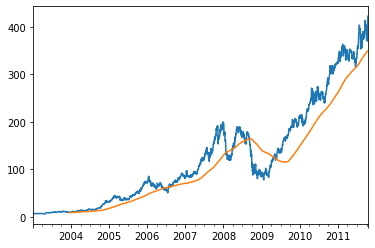

In [91]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates = True, index_col = 0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

close_px.AAPL.plot()
# rolling(250) - 250일 크기의 움직이는 창을 통해 그룹핑할 수 있는 객체 생성 
close_px.AAPL.rolling(250).mean().plot()

In [98]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
print(aapl_std250[5:12])
print("-----------------------------------------")

# expanding() - 확장창 평균(expanding window mean)
expanding_mean = appl_std250.expanding().mean()
print(expanding_mean)
print("-----------------------------------------")

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64
-----------------------------------------
2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64
-----------------------------------------


<AxesSubplot:>

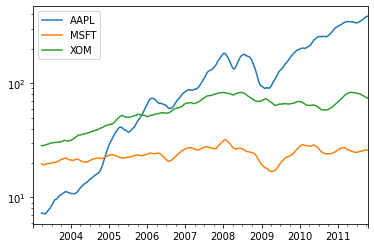

In [99]:
close_px.rolling(60).mean().plot(logy=True) #logy = True : log 스케일

In [100]:
print(close_px.rolling('20D').mean())
print("-----------------------------------------")

                  AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
...                ...        ...        ...
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333

[2292 rows x 3 columns]
-----------------------------------------


#### 11.7.1 지수 가중 함수

<AxesSubplot:>

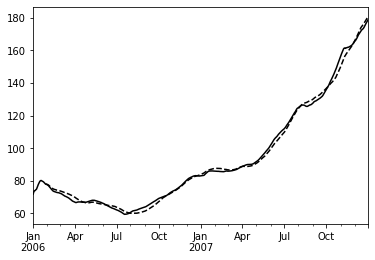

In [104]:
# ewm - 지수 가중 평균
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(60, min_periods=20).mean()
ewma60 = aapl_px.ewm(span = 60).mean()

ma60.plot(style = 'k--', label = 'Simple MA')
ewma60.plot(style = 'k-', label = 'EW MA')

#### 11.7.2 이진 이동창 함수

<AxesSubplot:>

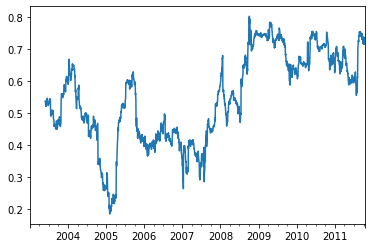

In [102]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

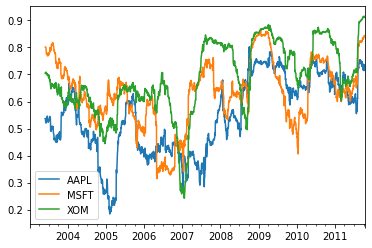

In [103]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()